In [1]:
cd ../images

/blue/adamginsburg/adamginsburg/jwst/brick/images


In [2]:
from astropy.io import fits
import reproject
from astropy import convolution
from astropy.convolution import Gaussian2DKernel
from astropy import units as u
from astropy.table import Table
import pyavm
import shutil

In [3]:
import regions
from astropy import coordinates

In [4]:
import PIL

In [5]:
from spectral_cube import SpectralCube, Projection, Slice

In [6]:
import uvcombine
from astropy import wcs

In [7]:
import scipy.ndimage

In [8]:
import matplotlib
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

In [9]:
import numpy as np

In [10]:
import pylab as pl
from astropy.visualization import simple_norm

In [11]:
Table(fits.open("last2022version/jw02221-o001_t001_nircam_clear-f410m_i2d.fits")[9].data)

ASDF_METADATA
uint8[36835]
35 .. 0


In [12]:
tgt_header = fits.getheader("last2022version/jw02221-o001_t001_nircam_clear-f410m_i2d.fits", ext=1)

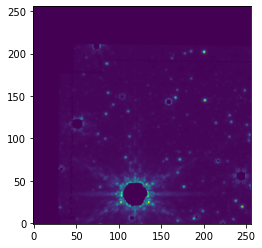

In [13]:
pl.imshow(fits.getdata("last2022version/jw02221-o001_t001_nircam_clear-f410m_i2d.fits", ext=1)[-256:,:256,], origin='lower')

153: -1000001000000000000000000000000
187: -0100001000000000000000000000000
252: -0010001000000000000000000000000
265: -0000011000000000000000000000000
266: -0000010000000000000000000000000
267: -0000001000000000000000000000000


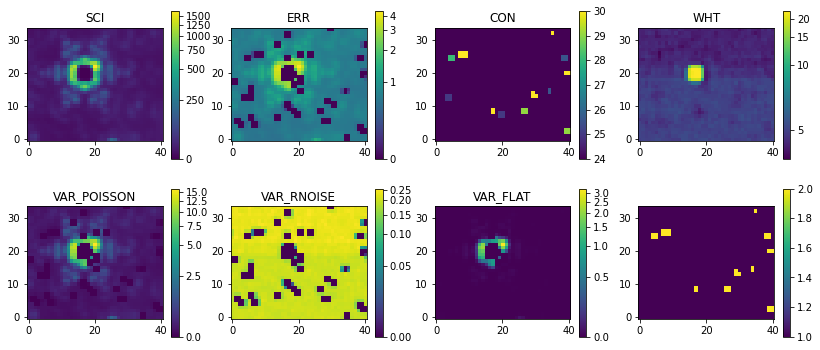

In [14]:
fh = fits.open("last2022version/jw02221-o001_t001_nircam_f405n-f444w_i2d.fits")
cutout = slice(2076,2110), slice(4201,4242)
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    if ext.header['EXTNAME'] == 'CON':
        pl.imshow(np.log2(-im[cutout]), origin='lower')
    else:
        pl.imshow(im[cutout],
                  norm=simple_norm(im[cutout], stretch='asinh'),
                  origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])
ext = fh[3]
ext_remap = ext.data.copy()[cutout]
for ii,val in enumerate(np.unique(ext.data)):
    msk = ext.data[cutout] == val
    if msk.any():
        ext_remap[msk] = f'{val:032b}'.count('1')
        print(f'{ii}: {val:032b}')
pl.subplot(2,4,8)
pl.imshow(ext_remap, origin='lower')
pl.colorbar()

/scratch/local/56668455/ipykernel_52277/1716345875.py:11: RuntimeWarning: divide by zero encountered in log2
  pl.imshow(np.log2(im.squeeze()[cutout]), origin='lower')


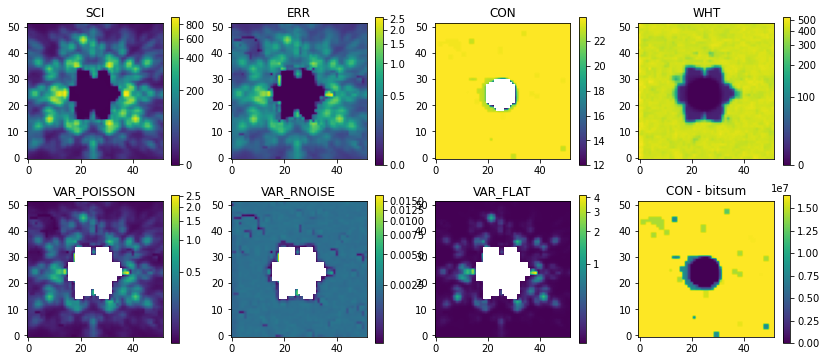

In [15]:
# There was a change sometime between ~January and February 2023
# the .squeeze() was not needed before; somehow an extra dimension has gotten tagged on?
basepath = '/orange/adamginsburg/jwst/brick/'
fh = fits.open(f"{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_i2d.fits")
cutout = slice(1158, 1210), slice(2109,2161)
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    if ext.header['EXTNAME'] == 'CON':
        pl.imshow(np.log2(im.squeeze()[cutout]), origin='lower')
    else:
        pl.imshow(im[cutout],
                  norm=simple_norm(im.squeeze()[cutout], stretch='asinh'),
                  origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])
ext = fh[3]
ext_remap = ext.data.copy().squeeze()[cutout]
for ii,val in enumerate(np.unique(ext.data)):
    msk = ext.data[cutout] == val
    if msk.any():
        ext_remap[msk] = f'{val:032b}'.count('1')
        #print(f'{ii}: {val:032b}')
pl.subplot(2,4,8)
pl.imshow(ext_remap, origin='lower')
pl.title("CON - bitsum")
pl.colorbar()

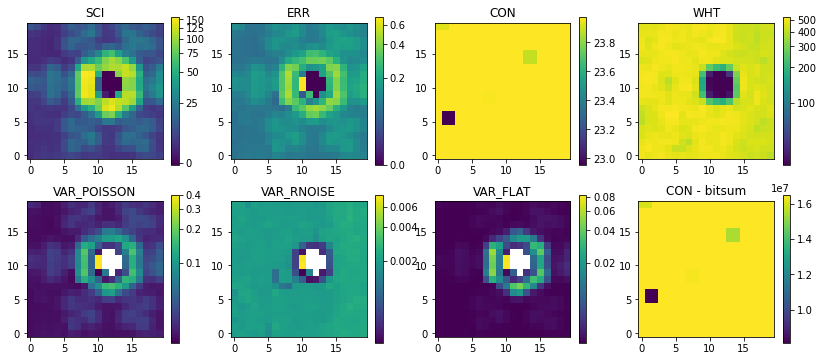

In [17]:
basepath = '/orange/adamginsburg/jwst/brick/'
fh = fits.open(f"{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_i2d.fits")
cutout = slice(967, 967+20), slice(2099, 2099+20)
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    if ext.header['EXTNAME'] == 'CON':
        pl.imshow(np.log2(im.squeeze()[cutout]), origin='lower')
    else:
        pl.imshow(im[cutout],
                  norm=simple_norm(im.squeeze()[cutout], stretch='asinh'),
                  origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])
ext = fh[3]
ext_remap = ext.data.copy().squeeze()[cutout]
for ii,val in enumerate(np.unique(ext.data)):
    msk = ext.data[cutout] == val
    if msk.any():
        ext_remap[msk] = f'{val:032b}'.count('1')
        print(f'{ii}: {val:032b}')
pl.subplot(2,4,8)
pl.imshow(ext_remap, origin='lower')
pl.title("CON - bitsum")
pl.colorbar()

/scratch/local/56668455/ipykernel_52277/1038758323.py:15: RuntimeWarning: divide by zero encountered in log2
  pl.imshow(np.log2(fh['DQ'].data[slcs]), origin='lower', vmin=0, vmax=8, cmap='Spectral')


[      0       2       3 1311747 4194304 4194307]
[0 2]
[      0       2       3 1311747 4194304 4194307]
[      0       2 4194304]
[         0          2 2150629376]
[      0       2       3 1311747 4194304 4194306]
[0 2]
[         0          2    4194306 2150629376 2150629378]
[      0       2 4194304 4194306]
[0 2]
[      0       2 4194304 4194306]
[      0       2 4194304]
[      0       2 4194304 4194306]
[      0       2 4194304]
[      0       2   32769 4194304]
[      0       2 4194304 4194306]
[      0       2       3 1327105]
[      0       2 4194304 4194306]
00000000000000000000000000000000
00000000000000000000000000000010
00000000000000000000000000000011
00000000000101000000010000000011


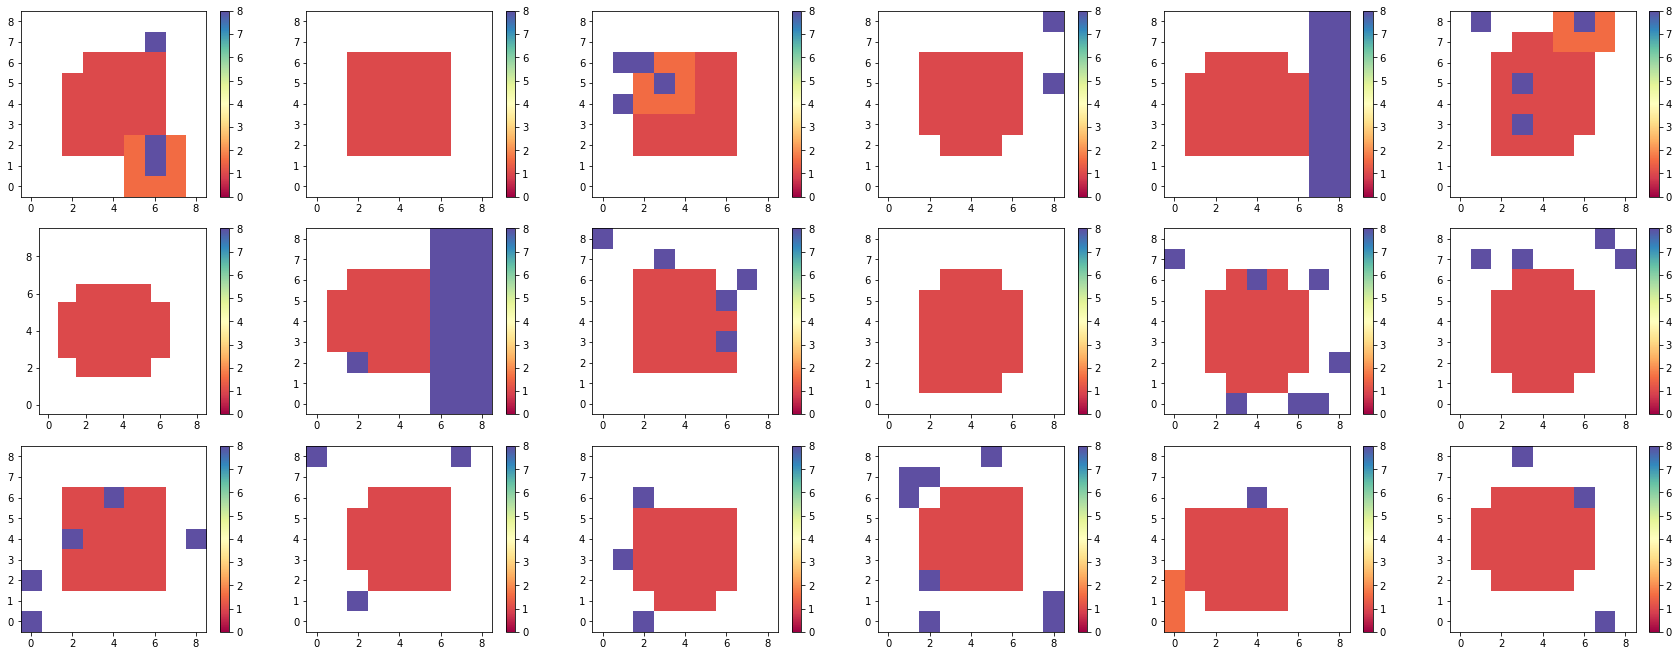

In [18]:
import glob
from astropy.coordinates import SkyCoord
basepath = '/orange/adamginsburg/jwst/brick/'
ii=1
reg = regions.RectangleSkyRegion(center=SkyCoord('17:46:07.697 -28:43:32.38', unit=(u.h, u.deg), frame='icrs'),
                                 height=0.5*u.arcsec, width=0.5*u.arcsec)
pl.figure(figsize=(24,12))
for fn in glob.glob(f"{basepath}/F410M/pipeline/jw02221*nrca*cal.fits"):
    fh = fits.open(fn)
    ww = wcs.WCS(fh[1].header)
    msk = reg.to_pixel(ww).to_mask()
    slcs,_ = msk.get_overlap_slices(fh[1].data.shape)
    pl.subplot(4,6,ii)
    try:
        pl.imshow(np.log2(fh['DQ'].data[slcs]), origin='lower', vmin=0, vmax=8, cmap='Spectral')
        print(np.unique(fh['DQ'].data[slcs]))
        pl.colorbar()
    except Exception:
        continue
    ii+=1
pl.tight_layout()
for ii in (0,2,3,1311747):
    print(f"{ii:032b}")

In [19]:
for ii,hdu in enumerate(fh):
    try:
        print(ii, hdu.header['EXTNAME'])
    except Exception:
        print(ii)

0
1 SCI
2 ERR
3 DQ
4 AREA
5 VAR_POISSON
6 VAR_RNOISE
7 VAR_FLAT
8 ASDF


/scratch/local/56668455/ipykernel_52277/3781842376.py:9: RuntimeWarning: divide by zero encountered in log2
  pl.imshow(np.log2(im[cutout]), origin='lower')


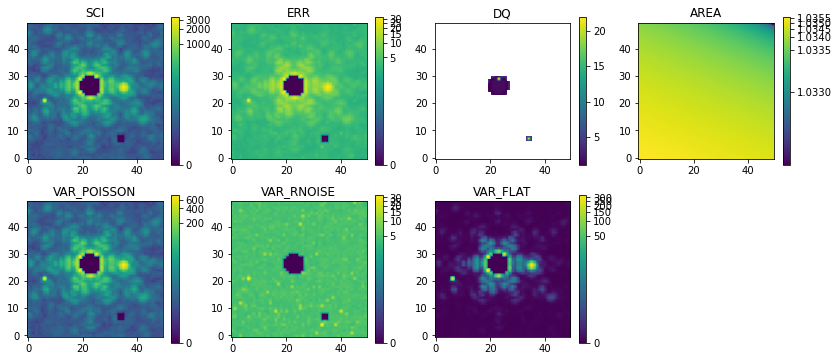

In [20]:
fh = fits.open("../F405N/pipeline/jw02221001001_03101_00003_nrcblong_o001_crf.fits")
#cutout = slice(2076,2114), slice(4201,4242)
cutout = slice(150,200), slice(350,400)
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    if ext.header['EXTNAME'] == 'DQ':
        pl.imshow(np.log2(im[cutout]), origin='lower')
    else:
        pl.imshow(im[cutout],
                  norm=simple_norm(im[cutout], stretch='log'),
                  origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])

In [21]:
cutout = slice(150,200), slice(350,400)
fh = fits.open("../F405N/pipeline/jw02221001001_03101_00003_nrcblong_o001_crf.fits")
for val in np.unique(fh['DQ'].data[cutout][fh['ERR'].data[cutout] == 0]):
    print(f"{val:032b}")

00000000000000000000000000000010
00000000000000000000000000000011
00000000000000000000000000010011
00000000000101000000010000010011
00000000010000000000000000000011


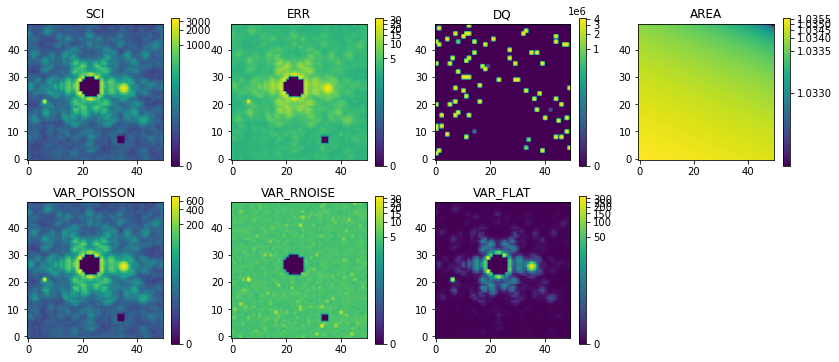

In [22]:
fh = fits.open("../F405N/pipeline/jw02221001001_03101_00003_nrcblong_cal.fits")
#cutout = slice(2076,2114), slice(4201,4242)
cutout = slice(150,200), slice(350,400)
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    pl.imshow(im[cutout],
              norm=simple_norm(im[cutout], stretch='log'),
              origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])

In [23]:
for ii,hdu in enumerate(fh):
    try:
        print(ii, hdu.header['EXTNAME'])
    except Exception:
        print(ii)

0
1 SCI
2 ERR
3 DQ
4 AREA
5 VAR_POISSON
6 VAR_RNOISE
7 VAR_FLAT
8 ASDF


In [24]:
from astropy.table import Table

In [25]:
Table(fh[-1].data)

ASDF_METADATA
uint8[24905]
35 .. 0


In [29]:
fn = f'{basepath}/images/last2022version/jw02221-o001_t001_nircam_f444w-f466n_i2d.fits'
data = fits.getdata(fn, ext=('SCI', 1))
weight = fits.getdata(fn, ext=('WHT', 1))

datamax = np.nanmax(data)
#data[weight==0] = np.nanmax(data)
# NOPE! negatives everywhere data[data<0] = np.nanmax(data)
labels, nlabels = scipy.ndimage.label(weight==0)
lsums = scipy.ndimage.sum_labels(np.ones_like(weight), labels, range(nlabels+1))
edge_indices = np.arange(nlabels+1)[lsums > 250][1:] # 1: excludes the 0'th, which is all weight!=0's
for labelno in edge_indices:
    msk = labels==labelno
    data[msk] = np.nan
    labels[msk] = 0

# the rest are our saturated pixels
msk = labels != 0
msk = scipy.ndimage.binary_dilation(msk, iterations=2)
data[msk] = np.nanmax(data)
#smdata = convolution.convolve(data, Gaussian2DKernel(x_stddev=3, x_size=35), nan_treatment='interpolate')
#data[weight==0] = smdata[weight==0]

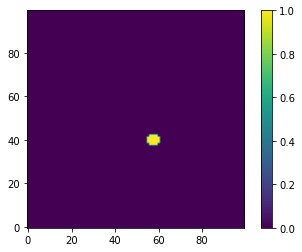

In [30]:
pl.imshow(weight[1150:1250,3000:3100] == 0, origin='lower')
pl.colorbar()

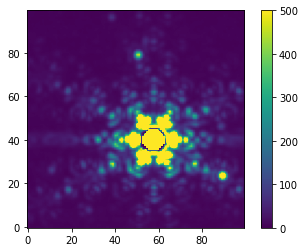

In [31]:
pl.imshow(data[1150:1250,3000:3100], origin='lower', vmin=0, vmax=500)
pl.colorbar()

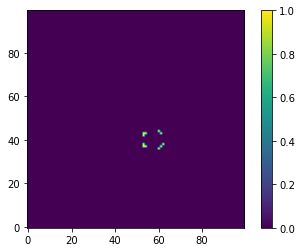

In [32]:
pl.imshow(data[1150:1250,3000:3100] < 0, origin='lower')
pl.colorbar()

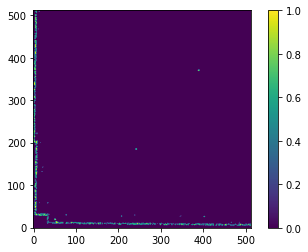

In [33]:
pl.imshow(data[:512,:512] < 0, origin='lower')
pl.colorbar()

In [34]:
basepath = '/orange/adamginsburg/jwst/brick/'

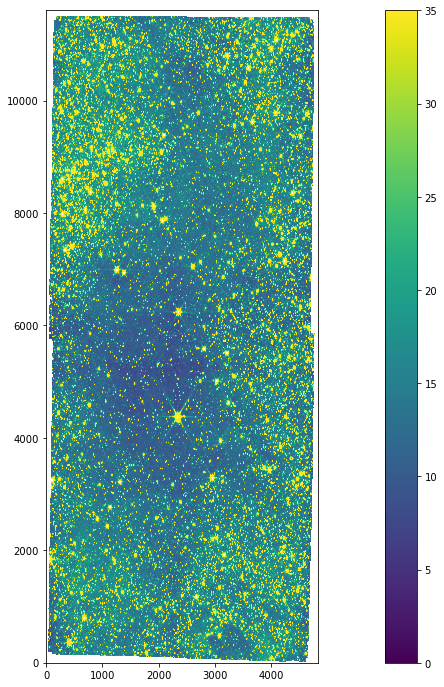

In [35]:
data = fits.getdata(f'{basepath}/F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged-reproject_i2d.fits',)
pl.figure(figsize=(24,12))
#pl.imshow(data < 0, origin='lower')#, norm=simple_norm(data, stretch='log'))
pl.imshow(data, vmax=35, vmin=0, origin='lower')#, norm=simple_norm(data, stretch='log'))
pl.colorbar()

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
image_filenames = {
"f182m": f"{basepath}/F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged-reproject_i2d.fits",
"f187n": f"{basepath}/F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged-reproject_i2d.fits",
"f212n": f"{basepath}/F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged-reproject_i2d.fits",
"f405n": f"{basepath}/F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged-reproject_i2d.fits",
"f410m": f"{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged-reproject_i2d.fits",
"f466n": f"{basepath}/F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged-reproject_i2d.fits",
}
repr410_image_filenames = {x: y.replace("i2d", "i2d_reprj_f410") for x,y in image_filenames.items()}

In [38]:
#for fn in (
#           'jw02221-o001_t001_nircam_clear-f410m_i2d.fits',
#           'jw02221-o001_t001_nircam_f405n-f444w_i2d.fits',
#           'jw02221-o001_t001_nircam_f444w-f466n_i2d.fits',
#           'jw02221-o001_t001_nircam_clear-f182m_i2d.fits',
#           # these two are mostly negative
#           #'jw02221-o001_t001_nircam_clear-f187n_i2d.fits',
#           #'jw02221-o001_t001_nircam_clear-f212n_i2d.fits',
#          ):
for fn in image_filenames.values():
    print(fn)
    data = fits.getdata(fn, ext=('SCI', 1))
    weight = fits.getdata(fn, ext=('WHT', 1))
    #err = fits.getdata(fn, ext=('ERR', 1))
    # data[weight==0] = np.nan
    
    datamax = np.nanmax(data)
    #data[weight==0] = np.nanmax(data)
    data[scipy.ndimage.binary_dilation(scipy.ndimage.binary_erosion(data<0))] = np.nanmax(data)
    labels, nlabels = scipy.ndimage.label((weight == 0) )#& (err == 0))
    lsums = scipy.ndimage.sum_labels(np.ones_like(weight), labels, range(nlabels+1))
    edge_indices = np.arange(nlabels+1)[lsums > 550][1:] # 1: excludes the 0'th, which is all weight!=0's
    print(f"masking {fn}")
    edgemask = np.isin(labels, edge_indices)
    # deal with the edge values being negative sometimes
    edgemask = scipy.ndimage.binary_dilation(edgemask, iterations=15)
    labels[edgemask] = 0

    # the rest are our saturated pixels
    msk = labels != 0
    msk = scipy.ndimage.binary_dilation(msk, iterations=2)
    data[msk] = np.nanmax(data)
    #data[np.isnan(err)] = np.nan
    #smdata = convolution.convolve(data, Gaussian2DKernel(x_stddev=1, x_size=35), nan_treatment='interpolate')
    #data[weight==0] = smdata[weight==0]
    print(f"reprojecting {fn}")
    reprj,_ = reproject.reproject_interp((data, fits.getheader(fn, ext=1)), tgt_header)
    fits.PrimaryHDU(data=reprj, header=tgt_header).writeto(fn.replace('.fits', '_reprj_f410.fits'), overwrite=True)
    print(f"done with {fn}")

/orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged-reproject_i2d.fits
masking /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged-reproject_i2d.fits
reprojecting /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged-reproject_i2d.fits
done with /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged-reproject_i2d.fits
/orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged-reproject_i2d.fits
masking /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged-reproject_i2d.fits
reprojecting /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged-reproject_i2d.fits
done with /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged-reproject_i2d.fits
/orange/adamginsburg/jwst/brick//F212N/pipeline/jw

# RGB Definition

In [39]:
rgb = np.array(
      [
          fits.getdata(repr410_image_filenames['f466n']),
          fits.getdata(repr410_image_filenames['f410m']),
          fits.getdata(repr410_image_filenames['f405n']),
       #fits.getdata(f"{basepath}/F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged-reproject_i2d_reprj_f410.fits"),
       #fits.getdata(f"{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged-reproject_i2d_reprj_f410.fits"),
       #fits.getdata(f"{basepath}/F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged-reproject_i2d_reprj_f410.fits"),
      ]
).swapaxes(0,2).swapaxes(0,1)
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


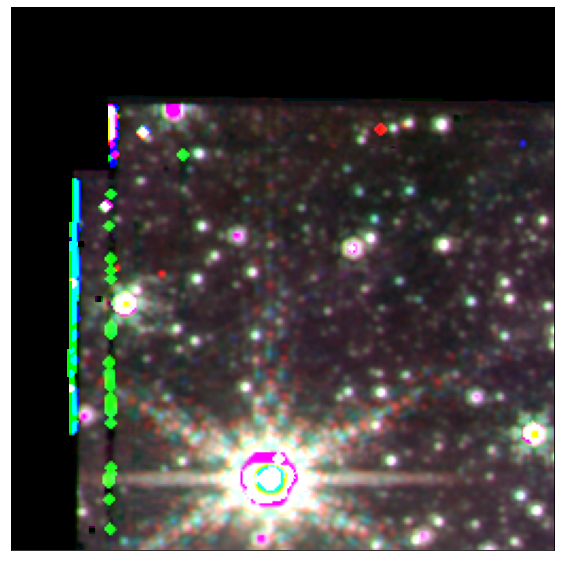

In [40]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=1, max_percent=99.)(rgb[-256:,:256,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=1, max_percent=99.)(rgb[-256:,:256,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=1, max_percent=99.)(rgb[-256:,:256,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
pl.scatter(132, 35, color='w', marker='x')

In [41]:
pixcrd = wcs.WCS(fits.getheader("jw02221-o001_t001_nircam_f444w-f466n_i2d.fits", ext=1)).world_to_pixel(wcs.WCS(tgt_header).pixel_to_world(2847, 1355))
xx,yy = map(int, pixcrd)
dd = 2
rgb[1355-dd:1355+dd, 2847-dd:2847+dd, 0],  fits.getdata("jw02221-o001_t001_nircam_f444w-f466n_i2d.fits", ext=1)[yy-dd:yy+dd,xx-dd:xx+dd]

FileNotFoundError: [Errno 2] No such file or directory: 'jw02221-o001_t001_nircam_f444w-f466n_i2d.fits'

In [ ]:
cutout = slice(1200, 1456), slice(2821, 3077)
cutout = slice(1330, 1400), slice(2821, 2900)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,0][cutout]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,1][cutout]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,2][cutout])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
pl.scatter(26, 25, color='w', marker='x')

In [ ]:
fh = fits.open("jw02221-o001_t001_nircam_f444w-f466n_i2d.fits")
cutout = slice(1200, 1456), slice(2821, 3077)
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    pl.imshow(im[cutout],
              norm=simple_norm(im[cutout], stretch='asinh'),
              origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])
pl.subplot(2,4,8)
pl.imshow((fh[('WHT',1)].data == 0)[cutout] & (fh[('ERR',1)].data==0)[cutout], origin='lower')
#pl.imshow(fits.getdata("jw02221-o001_t001_nircam_clear-f410m_i2d_reprj_f410.fits")[cutout],
#          origin='lower')
pl.colorbar()
pl.figure()
pl.imshow(fits.getdata("jw02221-o001_t001_nircam_f444w-f466n_i2d_reprj_f410.fits")[cutout], origin='lower')

In [ ]:
fh = fits.open("jw02221-o001_t001_nircam_clear-f410m_i2d.fits")
cutout = slice(-256,None), slice(0, 256)
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    pl.imshow(im[cutout],
              norm=simple_norm(im[cutout], stretch='asinh'),
              origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])
pl.subplot(2,4,8)
pl.imshow((fh[('WHT',1)].data == 0)[cutout] & (fh[('ERR',1)].data==0)[cutout], origin='lower')
#pl.imshow(fits.getdata("jw02221-o001_t001_nircam_clear-f410m_i2d_reprj_f410.fits")[cutout],
#          origin='lower')
pl.colorbar()

In [ ]:
fh[('CON', 1)].data[-5:,:5]

In [ ]:
np.isnan(rgb[0]).sum()

##### doesn't work rgb[rgb[:,:,1] == 0,:] = np.nanmax(rgb[:,:,1])

In [ ]:
rgb2 = np.array(
      [
          fits.getdata(repr410_image_filenames['f187n']),
          fits.getdata(repr410_image_filenames['f212n']),
          fits.getdata(repr410_image_filenames['f182m']),
       #fits.getdata("jw02221-o001_t001_nircam_clear-f187n_i2d_reprj_f410.fits"),
       #fits.getdata("jw02221-o001_t001_nircam_clear-f212n_i2d_reprj_f410.fits"),
       #fits.getdata("jw02221-o001_t001_nircam_clear-f182m_i2d_reprj_f410.fits"),
      ]
).swapaxes(0,2).swapaxes(0,1)

In [ ]:
rgb2.shape

In [ ]:
rgb.shape

In [ ]:
#fits.PrimaryHDU(data=f466m410, header=tgt_header).writeto('f466-f410.fits')

In [ ]:
ww = wcs.WCS(tgt_header)
ww.pixel_to_world(5683,2329)

In [ ]:
ww

In [ ]:
AVM = pyavm.AVM.from_header(tgt_header)

In [ ]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=1, max_percent=99)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=1, max_percent=99)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=1, max_percent=99)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(12,5))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

In [ ]:
def save_rgb(img, filename, avm=None):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::-1,:,:])
    img.save(filename)
    if avm is not None:
        avm.embed(filename, 'avm_'+filename)
        shutil.move('avm_'+filename, filename)

In [ ]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

#pl.savefig("BrickJWST_longwave_RGB_unrotated.png", dpi=300, bbox_inches='tight')
save_rgb(rgb_scaled, "BrickJWST_longwave_RGB_unrotated.png", AVM)
AVM.embed("BrickJWST_longwave_RGB_unrotated.png", "BrickJWST_longwave_RGB_unrotated.png")

In [ ]:
rgb[35-256,132]

In [ ]:
rgb_scaled = np.array([simple_norm(rgb2[:,:,0], stretch='asinh', min_percent=1, max_percent=99.)(rgb2[:,:,0]),
                       simple_norm(rgb2[:,:,1], stretch='asinh', min_percent=1, max_percent=99.)(rgb2[:,:,1]),
                       simple_norm(rgb2[:,:,2], stretch='asinh', min_percent=1, max_percent=99.)(rgb2[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
outpng = "BrickJWST_shortwave_RGB_187_212_182.png"
save_rgb(rgb_scaled, outpng, AVM)
AVM.embed(outpng, outpng)

In [ ]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb2[:,:,1], stretch='asinh', min_percent=1, max_percent=99.)(rgb2[:,:,1]),
                       simple_norm(rgb2[:,:,2], stretch='asinh', min_percent=1, max_percent=99.)(rgb2[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
outpng = "BrickJWST_RGB_466_212_182.png"
save_rgb(rgb_scaled, outpng, AVM)
AVM.embed(outpng, outpng)

In [ ]:
fits.PrimaryHDU(data=rgb_scaled, header=fits.getheader('jw02221-o001_t001_nircam_clear-f410m_i2d.fits', ext=1)).writeto('rgb_466_410_405.fits', overwrite=True)

In [ ]:
rgb_scaled = np.array([simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2]),
                       simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1])]).swapaxes(0,2).swapaxes(0,1)
# hsv = rgb_to_hsv(rgb_scaled)
# hsv[:,:,0] += 0.25  # 0.25 = 90/360
# hsv[:,:,0] = hsv[:,:,0] % 1 
# rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
outpng = "BrickJWST_RGB_405_466_410.png"
save_rgb(rgb_scaled, outpng, AVM)
AVM.embed(outpng, outpng)

In [ ]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
outpng = "BrickJWST_longwave_RGB.png"
save_rgb(rgb_scaled, outpng, AVM)
AVM.embed(outpng, outpng)

In [ ]:
alma_feathered = '../alma/Brick_ALMA+SD_3mm_continuum_MGPS_Feathered.fits'
if not os.path.exists(alma_feathered):
    almafits = SpectralCube.read('../alma/Brick_ALMA+SD_3mm_continuum.fits')
    almafits_repr,_ = reproject.reproject_interp(almafits[0].hdu, tgt_header)
    gbt = Projection.from_hdu(fits.open('/orange/adamginsburg/mgps/mgps/SgrB2/SgrB2_5pass_1_.0.2_10mJy_10mJy_w_session5_final_smooth4_PlanckCombined.fits'))
    hdr = tgt_header.copy()
    hdr['RESTFRQ']  = almafits.spectral_axis[0].to(u.Hz).value
    hdr['REFFREQ']  = almafits.spectral_axis[0].to(u.Hz).value
    almafits_prj = Projection(value=almafits_repr, header=hdr, wcs=wcs.WCS(hdr), unit=almafits[0].unit, beam=almafits[0].beam)
    feath = uvcombine.feather_simple(almafits_prj, gbt)
    fits.PrimaryHDU(data=feath.real, header=tgt_header).writeto(alma_feathered, overwrite=True)

In [ ]:
feathhdu = fits.open(alma_feathered)[0]
feath_repr,_ = reproject.reproject_interp(feathhdu, tgt_header)

In [ ]:
pl.imshow(feathhdu.data.real)

pl.imshow(gbt.value, origin='lower', norm=simple_norm(gbt.value, stretch='log'))

In [ ]:
feath_reprcp = feath_repr.copy()
#feath_reprcp[np.isnan(feath_repr) | (feath_repr==0)] = sm_alma[np.isnan(feath_repr)]
alma_rgb = np.array([
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*0.2,),
                     #np.zeros_like(feath_reprcp), min_percent=1,9
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*0.05),
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*0.8),
                    ]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv) + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1
#rgb_scaled /= rgb_scaled.max()
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
#pl.xlim(700, 5000)

outpng = "BrickALMAJWST_PurpleHaze.png"
save_rgb(rgb_scaled, outpng, avm=AVM)
AVM.embed(outpng, outpng)

In [ ]:
feath_reprcp = feath_repr.copy()
#feath_reprcp[np.isnan(feath_repr) | (feath_repr==0)] = sm_alma[np.isnan(feath_repr)]
alma_rgb = np.array([
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*0.5,),
                     #np.zeros_like(feath_reprcp), min_percent=1,9
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*0.5),
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*0.5),
                    ]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv) + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1
#rgb_scaled /= rgb_scaled.max()
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
#pl.xlim(700, 5000)
outpng = "BrickALMAJWST_WhiteHaze.png"
save_rgb(rgb_scaled, outpng, avm=AVM)
AVM.embed(outpng, outpng)

In [ ]:
feath_reprcp = feath_repr.copy()
#feath_reprcp[np.isnan(feath_repr) | (feath_repr==0)] = sm_alma[np.isnan(feath_repr)]
alma_rgb = np.array([
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(92/255),),
                     #np.zeros_like(feath_reprcp), min_percent=1,9
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(64/255)),
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(51/255)),
                    ]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv) + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1
#rgb_scaled /= rgb_scaled.max()
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
#pl.xlim(700, 5000)
outpng = "BrickALMAJWST_BrownHaze.png"
save_rgb(rgb_scaled, outpng, avm=AVM)
AVM.embed(outpng, outpng)

In [ ]:
rgb_scaled.shape

In [ ]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled[1900:2100,2500:2700], origin='lower')
pl.xticks([]);
pl.yticks([]);

In [ ]:
f410m405 = rgb[:,:,1] - (rgb[:,:,2]) * 0.17
f405m410 = rgb[:,:,2] - f410m405 # * 0.17
f466m410 = rgb[:,:,0] - f410m405 * 0.8 # from F466_separation
f466m410 = rgb[:,:,0] - f410m405 * 0.6 # from F466_separation

In [ ]:
pl.imshow(f410m405, norm=simple_norm(f410m405, stretch='log', min_cut=-20, max_cut=200))
pl.colorbar()

In [ ]:
pl.imshow(rgb[:,:,0], norm=simple_norm(rgb[:,:,0], stretch='log', min_percent=1, max_percent=99.),)
pl.colorbar()

In [ ]:
pl.imshow(rgb[:,:,1], norm=simple_norm(rgb[:,:,1], stretch='log', min_percent=1, max_percent=99.),)
pl.colorbar()

In [ ]:
pl.imshow(f466m410, norm=simple_norm(f466m410, stretch='log', min_percent=1, max_percent=99.),)
pl.colorbar()

In [ ]:
rgb_scaled = np.array([simple_norm(f405m410, stretch='log', min_cut=0, max_cut=500)(f405m410),
                       simple_norm(f466m410, stretch='log', min_cut=0, max_cut=800)(f466m410),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled[rgb_scaled < 0] = 0
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += 0.25  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
outpng = "BrickJWST_ContSub_LongWave.png"
save_rgb(rgb_scaled, outpng, avm=AVM)
AVM.embed(outpng, outpng)

In [ ]:
pl.imshow(f410m405, norm=simple_norm(f410m405, stretch='log', min_cut=0, max_cut=200))#max_percent=99.95),)
pl.colorbar()

In [ ]:
pl.imshow(f410m405, norm=simple_norm(f410m405, stretch='log', min_cut=0, max_percent=99.),)
pl.colorbar()

In [ ]:
rgb_scaled = np.array([simple_norm(f466m410, stretch='asinh', min_cut=-1, max_cut=100)(f466m410),
                       simple_norm(f410m405, stretch='asinh', min_cut=-1, max_cut=100)(f410m405),
                       simple_norm(f405m410, stretch='asinh', min_cut=-1, max_cut=100)(f405m410)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);
outpng = "BrickJWST_longwave_RGB_contsubbed.png"
save_rgb(rgb_scaled, outpng, avm=AVM)
AVM.embed(outpng, outpng)

# Spitzer

In [ ]:
ww = wcs.WCS(tgt_header)
ww.calc_footprint()

In [ ]:
poly = regions.PolygonSkyRegion(coordinates.SkyCoord(ww.calc_footprint()[:,0], ww.calc_footprint()[:,1], unit=(u.deg, u.deg), frame=ww.wcs.radesys.lower()))

In [ ]:
i1 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I1.fits')
i2 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I2.fits')
i3 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I3.fits')
i4 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I4.fits')
m24 = fits.open('/orange/adamginsburg/spitzer/mips/MG0000n005_024.fits')

In [ ]:
wwspitz = wcs.WCS(i1[0].header)

In [ ]:
polymask = poly.to_pixel(wwspitz).to_mask()

In [ ]:
tgt_header['CRPIX1'], tgt_header['NAXIS1']

In [ ]:
1.75*4

In [ ]:
tgt_header_spitzer = tgt_header.copy()
tgt_header_spitzer['NAXIS1'] = tgt_header_spitzer['NAXIS1'] // 4
tgt_header_spitzer['NAXIS2'] = tgt_header_spitzer['NAXIS2'] // 4
tgt_header_spitzer['CRPIX1'] /= 4
tgt_header_spitzer['CRPIX2'] /= 4
tgt_header_spitzer['CDELT1'] *= 4
tgt_header_spitzer['CDELT2'] *= 4

In [ ]:
AVMspitz = pyavm.AVM.from_header(tgt_header_spitzer)

In [ ]:
i1r,_ = reproject.reproject_interp(i1, tgt_header_spitzer)
i2r,_ = reproject.reproject_interp(i2, tgt_header_spitzer)
i3r,_ = reproject.reproject_interp(i3, tgt_header_spitzer)
i4r,_ = reproject.reproject_interp(i4, tgt_header_spitzer)
mipsr,_ = reproject.reproject_interp(m24, tgt_header_spitzer)

In [ ]:
rgb_spitzer = np.array([
    (i4r),
    (i2r),
    (i1r),
]).swapaxes(0,2).swapaxes(0,1)

In [ ]:
rgb_spitzer_234 = np.array([
    (i4r),
    (i3r),
    (i2r),
]).swapaxes(0,2).swapaxes(0,1)

In [ ]:
rgb_spitzer_134 = np.array([
    (i4r),
    (i3r),
    (i1r),
]).swapaxes(0,2).swapaxes(0,1)

In [ ]:
rgb_spitzer_mips = np.array([
    (mipsr),
    (i4r),
    (i2r),
]).swapaxes(0,2).swapaxes(0,1)

In [ ]:
pl.figure(figsize=(24,10))
rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,0]),
                               simple_norm(rgb_spitzer[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,1]),
                               simple_norm(rgb_spitzer[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,2])]).swapaxes(0,2).swapaxes(0,1)

pl.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')
pl.xticks([]);
pl.yticks([]);
pl.savefig("Spitzer_RGB_I421.png", dpi=300)
outpng = "BrickSpitzer_RGB_I421.png"
save_rgb(rgb_spitzer_scaled, outpng, avm=AVMspitz)
AVMspitz.embed(outpng, outpng)

In [ ]:
pl.figure(figsize=(24,10))
rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer_134[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_134[:,:,0]),
                               simple_norm(rgb_spitzer_134[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_134[:,:,1]),
                               simple_norm(rgb_spitzer_134[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_134[:,:,2])]).swapaxes(0,2).swapaxes(0,1)

pl.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')
pl.xticks([]);
pl.yticks([]);
pl.savefig("Spitzer_RGB_I431.png", dpi=300)
outpng = "BrickSpitzer_RGB_I431.png"
save_rgb(rgb_spitzer_scaled, outpng, avm=AVMspitz)
AVMspitz.embed(outpng, outpng)

In [ ]:
pl.figure(figsize=(24,10))
rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer_234[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_234[:,:,0]),
                               simple_norm(rgb_spitzer_234[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_234[:,:,1]),
                               simple_norm(rgb_spitzer_234[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_234[:,:,2])]).swapaxes(0,2).swapaxes(0,1)

pl.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')
pl.xticks([]);
pl.yticks([]);
pl.savefig("Spitzer_RGB_I432.png", dpi=300)
outpng = "BrickSpitzer_RGB_I432.png"
save_rgb(rgb_spitzer_scaled, outpng, avm=AVMspitz)
AVMspitz.embed(outpng, outpng)

In [ ]:
pl.imshow(mipsr)

In [ ]:
rgb_spitzer_123 = np.array([
    (i3r),
    (i2r),
    (i1r),
]).swapaxes(0,2).swapaxes(0,1)

In [ ]:
pl.figure(figsize=(24,10))
rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer_123[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_123[:,:,0]),
                               simple_norm(rgb_spitzer_123[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_123[:,:,1]),
                               simple_norm(rgb_spitzer_123[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_123[:,:,2])]).swapaxes(0,2).swapaxes(0,1)

pl.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')
pl.xticks([]);
pl.yticks([]);
pl.savefig("Spitzer_RGB_I321.png", dpi=300)
outpng = "BrickSpitzer_RGB_I321.png"
save_rgb(rgb_spitzer_scaled, outpng, avm=AVMspitz)
AVMspitz.embed(outpng, outpng)
pyavm.AVM.from_image(outpng);

In [ ]:
pl.figure(figsize=(24,10))
ax = pl.subplot(projection=wcs.WCS(tgt_header_spitzer))
rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer_123[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_123[:,:,0]),
                               simple_norm(rgb_spitzer_123[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_123[:,:,1]),
                               simple_norm(rgb_spitzer_123[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer_123[:,:,2]),
                              ]).swapaxes(0,2).swapaxes(0,1)

ra = ax.coords['ra']
ra.set_ticks(spacing=0.5 * u.arcmin)
dec = ax.coords['dec']
dec.set_ticks(spacing=0.5 * u.arcmin)

ax.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')
ax.coords.grid()
dec.set_axislabel('Declination')
ra.set_axislabel('Right Ascension')
ra.set_ticklabel_visible(True)
ra.set_ticklabel(size=20)

# Inset Zooms

In [ ]:
import copy

In [ ]:
from astropy import units as u
from astropy import coordinates
from astropy.stats import mad_std
from astropy import visualization
from astropy.visualization import simple_norm
import astropy.visualization
import copy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import radio_beam


def make_scalebar(ax, left_side, length, color='w', linestyle='-', label='',
                  fontsize=12, text_offset=0.1*u.arcsec):
    axlims = ax.axis()
    lines = ax.plot(u.Quantity([left_side.ra, left_side.ra-length]),
                    u.Quantity([left_side.dec]*2),
                    color=color, linestyle=linestyle, marker=None,
                    transform=ax.get_transform('fk5'),
                   )
    txt = ax.text((left_side.ra-length/2).to(u.deg).value,
                  (left_side.dec+text_offset).to(u.deg).value,
                  label,
                  verticalalignment='bottom',
                  horizontalalignment='center',
                  transform=ax.get_transform('fk5'),
                  color=color,
                  fontsize=fontsize,
                 )
    ax.axis(axlims)
    return lines,txt



def make_zoom(filename, zoom_parameters,
              overview_vis_pars={'max_percent':99.5, 'min_percent':0.5, 'stretch':'linear'},
              overview_cmap='gray_r',
              inset_cmap='inferno',
              main_zoombox=None,
              scalebar_loc=(0.1,0.1),
              scalebar_length=0.1*u.pc,
              beam_loc=(0.05, 0.05),
              nsigma_asinh=5,
              nsigma_max=10,
              nticks_inset=7,
              fontsize=20,
              tick_fontsize=16,
              distance=8.5*u.kpc
             ):

    fh = fits.open(filename)
    img = fh[0].data
    ww = WCS(fh[0].header)
    
    # cut out the minimal region that has data in it
    lbx,lby = np.argmax(np.any(notnan, axis=0)), np.argmax(np.any(notnan, axis=1))
    rtx,rty = notnan.shape[1] - np.argmax(np.any(notnan[::-1,::-1], axis=0)), notnan.shape[0] - np.argmax(np.any(notnan[::-1,::-1], axis=1))
    
    img = img[lby:rty, lbx:rtx]
    ww = ww[lby:rty, lbx:rtx]
    
    radesys = ww.wcs.radesys.upper()

    fig = pl.figure(1, figsize=(10,10))
    fig.clf()
    ax = fig.add_subplot(projection=ww.celestial)

    norm = simple_norm(img, **overview_vis_pars)

    img[img==0] = np.nan
    mad = mad_std(img, ignore_nan=True)

    if hasattr(norm.stretch, 'a') and nsigma_asinh is not None:
        norm.vmax = (np.nanmedian(img) + nsigma_max*mad)
        a_point = (np.nanmedian(img) + nsigma_asinh*mad) / norm.vmax
        norm.stretch.a = a_point
        print(f"numbers for norm: {np.nanmedian(img), nsigma_asinh, mad, nsigma_asinh*mad, norm.vmax, a_point}")

    im = ax.imshow(img, cmap=overview_cmap, norm=norm)

    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticks(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticks(exclude_overlapping=True)


    for zp in zoom_parameters:

        xl,xr = zp['xl'], zp['xr']
        yl,yu = zp['yl'], zp['yu']
        slc = [slice(yl,yu), slice(xl,xr)]
        axins = inset_axes(ax, **zp['inset_pars'],
                           axes_class=astropy.visualization.wcsaxes.core.WCSAxes,
                           axes_kwargs=dict(wcs=ww.celestial))

        norm2 = simple_norm(img, **zp['vis_pars'])

        inset_cm = copy.copy(pl.cm.get_cmap(inset_cmap))
        inset_cm.set_bad(inset_cm(0))

        im_ins = axins.imshow(img[slc], extent=[xl,xr,yl,yu], cmap=inset_cm, norm=norm2)
        mark_inset(parent_axes=ax, inset_axes=axins,
                   fc="none", ec="b", **zp['mark_inset_pars'])
        ra = axins.coords['ra']
        dec = axins.coords['dec']
        axins.set_xticklabels([])
        axins.set_yticklabels([])
        axins.xaxis.set_visible(False)
        axins.yaxis.set_visible(False)
        ra.set_ticks_visible(False)
        dec.set_ticks_visible(False)
        ra.set_axislabel('')
        dec.set_axislabel('')
        ra.ticklabels.set_visible(False)
        dec.ticklabels.set_visible(False)

        caxins = inset_axes(axins,
                 width="5%", # width = 10% of parent_bbox width
                 height="100%", # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=axins.transAxes,
                 borderpad=0,
                 )

        cbins = pl.colorbar(mappable=im_ins, cax=caxins)
        cbins.ax.tick_params(labelsize=tick_fontsize)
        cbins.set_label(f"S$_\\nu$ [Jy beam$^{-1}$]", fontsize=fontsize)

        if 'tick_locs' in zp:
            cbins.set_ticks(zp['tick_locs'])
            if 'tick_labels' in zp:
                cbins.set_ticklabels(zp['tick_labels'])
        elif 'asinh' in str(norm2.stretch).lower():
            rounded_loc, rounded = determine_asinh_ticklocs(norm2.vmin, norm2.vmax, nticks=nticks_inset)
            cbins.set_ticks(rounded_loc)
            cbins.set_ticklabels(rounded)
        elif'log' in str(norm2.stretch).lower():
            if norm2.vmin > 0:
                rounded_loc, rounded = determine_asinh_ticklocs(norm2.vmin, norm2.vmax, nticks=nticks_inset, rms=mad, stretch='log')
                cbins.set_ticks(rounded_loc)
                cbins.set_ticklabels(rounded)
            else:
                ticks = cbins.get_ticks()
                newticks = [norm2.vmin] + list(ticks)
                newticks = [norm2.vmin, 0,] + list(np.geomspace(mad, norm2.vmax, 4))
                print(f"ticks={ticks}, newticks={newticks}, mad={mad}, vmin={norm2.vmin}")
                cbins.set_ticks(newticks)

    if main_zoombox:
        ax.axis(main_zoombox)

    divider = make_axes_locatable(ax)
    cax1 = fig.add_axes([ax.get_position().x1+0.01,
                         ax.get_position().y0,
                         0.02,
                         ax.get_position().height])
    cb1 = pl.colorbar(mappable=im, cax=cax1)
    cb1.ax.tick_params(labelsize=tick_fontsize)
    cb1.set_label(f"S$_\\nu$ [Jy beam$^{-1}$]", fontsize=fontsize)
    pl.setp(cb1.ax.yaxis.get_label(), backgroundcolor="white")

    left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*img.shape[1],
                                                                        scalebar_loc[0]*img.shape[0], 0)*u.deg, frame='fk5')
    length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
    make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
                  text_offset=0.5*u.arcsec, fontsize=fontsize)

    beam = radio_beam.Beam.from_fits_header(fh[0].header)
    ell = beam.ellipse_to_plot(beam_loc[1]*img.shape[1], beam_loc[0]*img.shape[0], pixscale=ww.celestial.pixel_scale_matrix[1,1]*u.deg)
    ax.add_patch(ell)

In [ ]:
def hide_ticks(ax):
    ra = ax.coords['ra']
    dec = ax.coords['dec']
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ra.set_ticks_visible(False)
    dec.set_ticks_visible(False)
    ra.set_axislabel('')
    dec.set_axislabel('')
    ra.ticklabels.set_visible(False)
    dec.ticklabels.set_visible(False)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from matplotlib.transforms import Bbox

def mark_inset_otherdata(axins, parent_ax, bl, tr, loc1, loc2, edgecolor='b'):
    if 'GLON' in parent_ax.wcs.axis_type_names:
        blt = bl.transform_to('galactic')
        trt = tr.transform_to('galactic')
        (rx1,ry1),(rx2,ry2) = (parent_ax.wcs.wcs_world2pix([[blt.l.deg,
                                                             blt.b.deg]],0)[0],
                               parent_ax.wcs.wcs_world2pix([[trt.l.deg,
                                                             trt.b.deg]],0)[0]
                              )
    else:
        blt = bl.transform_to(parent_ax.wcs.wcs.radesys.lower())
        trt = tr.transform_to(parent_ax.wcs.wcs.radesys.lower())
        (rx1,ry1),(rx2,ry2) = (parent_ax.wcs.wcs_world2pix([[blt.ra.deg,
                                                             blt.dec.deg]],0)[0],
                               parent_ax.wcs.wcs_world2pix([[trt.ra.deg,
                                                             trt.dec.deg]],0)[0]
                              )
    bbox = Bbox(np.array([(rx1,ry1),(rx2,ry2)]))
    rect = TransformedBbox(bbox, parent_ax.transData)

    markinkwargs = dict(fc='none', ec=edgecolor)

    pp = BboxPatch(rect, fill=False, **markinkwargs)
    parent_ax.add_patch(pp)

    p1 = BboxConnector(axins.bbox, rect, loc1=loc1, **markinkwargs)
    axins.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(axins.bbox, rect, loc1=loc2, **markinkwargs)
    axins.add_patch(p2)
    p2.set_clip_on(False)

    return bbox, rect, p1, p2, pp

In [ ]:
tick_fontsize = 14
fontsize = 16

alma_rgb = np.array([
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(92/255),),
                     #np.zeros_like(feath_reprcp), min_percent=1,9
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(64/255)),
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(51/255)),
                    ]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv) + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
im = ax.imshow(rgb_scaled)

#ax.axis([167,1617,210,1618])
radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"")
_ = ax.set_ylabel(f"")

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*rgb_scaled.shape[1],
                                                             scalebar_loc[0]*rgb_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)



axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.1, 0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 50,400
yl,yr = 750,1100
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)




axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.4,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3000,3100
yl,yr = 200,300
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)

axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.7,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 5150,5350
yl,yr = 1700,2100
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

pl.savefig('/orange/adamginsburg/jwst/brick/images/BrickALMAJWST_BrownHaze_InsetZooms.png', dpi=300, bbox_inches='tight')

In [ ]:
tick_fontsize = 14
fontsize = 16

alma_rgb = np.array([
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(92/255),),
                     #np.zeros_like(feath_reprcp), min_percent=1,9
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(64/255)),
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(51/255)),
                    ]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv) + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
im = ax.imshow(rgb_scaled)

#ax.axis([167,1617,210,1618])
radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"")
_ = ax.set_ylabel(f"")

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*rgb_scaled.shape[1],
                                                             scalebar_loc[0]*rgb_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)



axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.1, 0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 50,400
yl,yr = 750,1100
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)




axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.37,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3000,3100
yl,yr = 200,300
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)
axins.set_zorder(50)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)

axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.64,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3150,3350
yl,yr = 1500,1700
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
_, _, p1, p2, pp = mark_inset_otherdata(axins, ax, bl, tr, 1, 3,)
p1.set_zorder(-10)
p2.set_zorder(-10)
hide_ticks(axins)

pl.savefig('/orange/adamginsburg/jwst/brick/images/BrickALMAJWST_BrownHaze_InsetZooms2.png', dpi=300, bbox_inches='tight')

In [ ]:
# display color mapping
%matplotlib inline
import pylab as pl
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import numpy as np

xrgb = [[[1,0], [0,1]],
        [[0,1], [0,1]],
        [[0,0], [1,1]]]
xrgb = np.array(xrgb).swapaxes(0,2).astype('float')
pl.subplot(1,2,1)
pl.imshow(xrgb)

pl.subplot(1,2,2)
hsv = rgb_to_hsv(xrgb)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
xrgb = hsv_to_rgb(hsv)# + alma_rgb
xrgb[xrgb > 1] = 1
pl.imshow(xrgb)

In [ ]:
tick_fontsize = 14
fontsize = 16

alma_rgb = np.array([
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(92/255),),
                     #np.zeros_like(feath_reprcp), min_percent=1,9
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(64/255)),
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(51/255)),
                    ]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)# + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
im = ax.imshow(rgb_scaled)

#ax.axis([167,1617,210,1618])
radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"")
_ = ax.set_ylabel(f"")

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*rgb_scaled.shape[1],
                                                             scalebar_loc[0]*rgb_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)



axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.1, 0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 50,400
yl,yr = 750,1100
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)




axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.37,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3000,3100
yl,yr = 200,300
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)
axins.set_zorder(50)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)

axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.64,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3150,3350
yl,yr = 1500,1700
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
_, _, p1, p2, pp = mark_inset_otherdata(axins, ax, bl, tr, 1, 3,)
p1.set_zorder(-10)
p2.set_zorder(-10)
hide_ticks(axins)

pl.savefig('/orange/adamginsburg/jwst/brick/images/BrickJWSTLong_InsetZooms2.png', dpi=300, bbox_inches='tight')

In [ ]:
tick_fontsize = 14
fontsize = 16

rgb_scaled = np.array([simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])*1.2,
                       simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       #np.zeros_like(rgb[:,:,0])#simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])
                      ]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled += simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1])[:,:,None]
#rgb_scaled /= 2
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += 0.25  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)# + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
im = ax.imshow(rgb_scaled)

#ax.axis([167,1617,210,1618])
radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"")
_ = ax.set_ylabel(f"")

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*rgb_scaled.shape[1],
                                                             scalebar_loc[0]*rgb_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)



axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.1, 0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 50,400
yl,yr = 750,1100
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)




axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.37,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3000,3100
yl,yr = 200,300
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)
axins.set_zorder(50)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)

axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.64,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3150,3350
yl,yr = 1500,1700
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
_, _, p1, p2, pp = mark_inset_otherdata(axins, ax, bl, tr, 1, 3,)
p1.set_zorder(-10)
p2.set_zorder(-10)
hide_ticks(axins)

pl.savefig('/orange/adamginsburg/jwst/brick/images/BrickJWSTLong_InsetZooms3.png', dpi=300, bbox_inches='tight')

In [ ]:
tick_fontsize = 14
fontsize = 16

rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2]),
                       #np.zeros_like(rgb[:,:,0])#simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])
                      ]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled += simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1])[:,:,None]
#rgb_scaled /= 2
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += 0.25  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)# + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
im = ax.imshow(rgb_scaled)

#ax.axis([167,1617,210,1618])
radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"")
_ = ax.set_ylabel(f"")

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*rgb_scaled.shape[1],
                                                             scalebar_loc[0]*rgb_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)



axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.12, 0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 950,1150
yl,yr = 1800,2000
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)




axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.38,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3500,3700
yl,yr =  1050,1250
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)
axins.set_zorder(50)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)

axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.64,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 4100,4300
yl,yr = 1500,1700
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
_, _, p1, p2, pp = mark_inset_otherdata(axins, ax, bl, tr, 1, 3,)
p1.set_zorder(-10)
p2.set_zorder(-10)
hide_ticks(axins)

pl.savefig('/orange/adamginsburg/jwst/brick/images/BrickJWSTLong_InsetZooms4_purplestars.png', dpi=300, bbox_inches='tight')

In [ ]:
tick_fontsize = 14
fontsize = 16

# no ALMA
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
im = ax.imshow(rgb_scaled)

rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,0]),
                               simple_norm(rgb_spitzer[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,1]),
                               simple_norm(rgb_spitzer[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,2])]).swapaxes(0,2).swapaxes(0,1)

wwspitzrep = wcs.WCS(tgt_header_spitzer)

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=wwspitzrep)
im = ax.imshow(rgb_spitzer_scaled)

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*wwspitzrep.celestial.wcs_pix2world(scalebar_loc[1]*rgb_spitzer_scaled.shape[1],
                                                                  scalebar_loc[0]*rgb_spitzer_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)



axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.1, 0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 50,400
yl,yr = 750,1100
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)




axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.37,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3000,3100
yl,yr = 200,300
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)
axins.set_zorder(50)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)

axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.64,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
xl,xr = 3150,3350
yl,yr = 1500,1700
bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
_, _, p1, p2, pp = mark_inset_otherdata(axins, ax, bl, tr, 1, 3,)
p1.set_zorder(-10)
p2.set_zorder(-10)
hide_ticks(axins)

pl.savefig('/orange/adamginsburg/jwst/brick/images/Spitzer_InsetZooms2.png', dpi=300, bbox_inches='tight')

In [ ]:
with open('../gtc-bubble/OB_star_candidates_final.dat', 'r') as fh:
    lines = fh.readlines()
    header = lines[12]
    tbldata = lines[13:]
    obstars = SkyCoord([SkyCoord(*row.split()[1:3], frame='icrs', unit=(u.h, u.deg)) for row in tbldata if '#' not in row])

In [ ]:
tick_fontsize = 14
fontsize = 16

alma_rgb = np.array([
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(92/255),),
                     #np.zeros_like(feath_reprcp), min_percent=1,9
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(64/255)),
                     np.nan_to_num(simple_norm(feath_reprcp, stretch='linear', min_percent=0, max_percent=99.97)(feath_reprcp)*(51/255)),
                    ]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)# + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
im = ax.imshow(rgb_scaled)

#ax.axis([167,1617,210,1618])
radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"")
_ = ax.set_ylabel(f"")

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*rgb_scaled.shape[1],
                                                             scalebar_loc[0]*rgb_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

#ax.scatter(obstars.ra.deg, obstars.dec.deg, transform=ax.get_transform('world'), facecolors='none', edgecolors='cyan')

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)

# sort by RA, then split into two groups, and sort those by dec
# (RA is vertical in this wacko image)
order = np.argsort(obstars.ra)
order2a = np.argsort(obstars.dec[order[:7]])
order2b = np.argsort(obstars.dec[order[7:]]) + 7
orders = np.concatenate([order2a,order2b])
print(order, order2a, order2b, orders)

ii = 0
for jj, star in enumerate(obstars[order[orders]]):

    xc,yc = ww.world_to_pixel(star)
    xl,xr = map(int, (xc - 15, xc + 15))
    yl,yr = map(int, (yc - 15, yc + 15))
    print(xl,xr,yl,yr)
    if xl > 0 and yl > 0 and yc < rgb_scaled.shape[0] and xc < rgb_scaled.shape[1]:

        nr = 7
        axins = inset_axes(ax,
                           loc=3, width=1.2, height=1.2,
                           axes_class=visualization.wcsaxes.core.WCSAxes,
                            bbox_to_anchor=(0.10 + 0.120 * (ii % nr),
                                            0.22 + 0.450 * (ii // nr),
                                            1,1),
                            bbox_transform=fig.transFigure,                    
                           axes_kwargs=dict(wcs=ww))
        bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
        tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
        axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
        if ii < nr:
            mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
        else:
            mark_inset_otherdata(axins, ax, bl, tr, 3, 4,)
        hide_ticks(axins)
        ii += 1

pl.savefig('/orange/adamginsburg/jwst/brick/images/BrickJWSTLong_InsetZooms_withOBstars.png', dpi=300, bbox_inches='tight')

In [ ]:
rgb_nostar = np.array(
      [
       #fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrca.fits'),
       #fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrca.fits'),
       fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'),
       fits.getdata(f'{basepath}/images/F410_minus_F405_merged-reproject.fits'),
       fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits'),          
      ]
).swapaxes(0,2).swapaxes(0,1)[:,::-1,:]
ww_nostar = wcs.WCS(fits.getheader(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits'))
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

In [ ]:
tick_fontsize = 14
fontsize = 16

rgb_scaled = np.array([simple_norm(rgb_nostar[:,:,2], stretch='asinh', min_cut=5, max_cut=150)(rgb_nostar[:,:,2]), # 405
                       simple_norm(rgb_nostar[:,:,0], stretch='asinh', min_cut=5, max_cut=75)(rgb_nostar[:,:,0]), # 466
                       simple_norm(rgb_nostar[:,:,1], stretch='asinh', min_cut=5, max_cut=50)(rgb_nostar[:,:,1]), # 410
                       #np.zeros_like(rgb[:,:,0])#simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])
                      ]).swapaxes(0,2)#.swapaxes(0,1)
#rgb_scaled += simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1])[:,:,None]
#rgb_scaled /= 2
#hsv = rgb_to_hsv(rgb_scaled)
#hsv[:,:,0] += 0.25  # 0.25 = 90/360
#hsv[:,:,0] = hsv[:,:,0] % 1 
#rgb_scaled = hsv_to_rgb(hsv)# + alma_rgb
rgb_scaled[rgb_scaled > 1] = 1

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww_nostar)
im = ax.imshow(rgb_scaled, origin='lower')

#ax.axis([167,1617,210,1618])
radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"")
_ = ax.set_ylabel(f"")

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*rgb_scaled.shape[1],
                                                             scalebar_loc[0]*rgb_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)

if True:

    axins = inset_axes(ax,
                       loc=3, width=3, height=3,
                       axes_class=visualization.wcsaxes.core.WCSAxes,
                        bbox_to_anchor=(0.1, 0.05,1,1),
                        bbox_transform=fig.transFigure,                    
                       axes_kwargs=dict(wcs=ww_nostar))
    xl,xr = 50,400
    yl,yr = 750,1100
    bl = coordinates.SkyCoord(*ww_nostar.wcs_pix2world(xl, yl, 0), frame=ww_nostar.wcs.radesys.lower(), unit=(u.deg,u.deg))
    tr = coordinates.SkyCoord(*ww_nostar.wcs_pix2world(xr, yr, 0), frame=ww_nostar.wcs.radesys.lower(), unit=(u.deg,u.deg))
    axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
    mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
    hide_ticks(axins)

    # scalebar_length = 5000*u.au
    # length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
    # left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
    # make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
    #               text_offset=0.1*u.arcsec, fontsize=fontsize)




    axins = inset_axes(ax,
                       loc=3, width=3, height=3,
                       axes_class=visualization.wcsaxes.core.WCSAxes,
                        bbox_to_anchor=(0.37,0.05,1,1),
                        bbox_transform=fig.transFigure,                    
                       axes_kwargs=dict(wcs=ww_nostar))
    xl,xr = 3000,3100
    yl,yr = 200,300
    bl = coordinates.SkyCoord(*ww_nostar.wcs_pix2world(xl, yl, 0), frame=ww_nostar.wcs.radesys.lower(), unit=(u.deg,u.deg))
    tr = coordinates.SkyCoord(*ww_nostar.wcs_pix2world(xr, yr, 0), frame=ww_nostar.wcs.radesys.lower(), unit=(u.deg,u.deg))
    axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
    mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
    hide_ticks(axins)
    axins.set_zorder(50)

    # scalebar_length = 5000*u.au
    # length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
    # left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
    # make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
    #               text_offset=0.1*u.arcsec, fontsize=fontsize)

    axins = inset_axes(ax,
                       loc=3, width=3, height=3,
                       axes_class=visualization.wcsaxes.core.WCSAxes,
                        bbox_to_anchor=(0.64,0.05,1,1),
                        bbox_transform=fig.transFigure,                    
                       axes_kwargs=dict(wcs=ww_nostar))
    xl,xr = 3150,3350
    yl,yr = 1500,1700
    bl = coordinates.SkyCoord(*ww_nostar.wcs_pix2world(xl, yl, 0), frame=ww_nostar.wcs.radesys.lower(), unit=(u.deg,u.deg))
    tr = coordinates.SkyCoord(*ww_nostar.wcs_pix2world(xr, yr, 0), frame=ww_nostar.wcs.radesys.lower(), unit=(u.deg,u.deg))
    axins.imshow(rgb_scaled[yl:yr, xl:xr, :], extent=[xl,xr,yl,yr], )
    _, _, p1, p2, pp = mark_inset_otherdata(axins, ax, bl, tr, 1, 3,)
    p1.set_zorder(-10)
    p2.set_zorder(-10)
    hide_ticks(axins)

    pl.savefig('/orange/adamginsburg/jwst/brick/images/BrickJWSTLong_InsetZooms_NoStars.png', dpi=300, bbox_inches='tight')